In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

from keras.datasets import fashion_mnist

In [3]:
BATCH_SIZE = 128
EPOCHS = 20

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) /255.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) /255.

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [14]:
augmented_images = datagen.flow(x_train, y_train, batch_size=len(x_train), shuffle=False)

x_train_augmented, y_train_augmented = next(augmented_images)

x_train_augmented = np.concatenate([x_train, x_train_augmented])
y_train_augmented = np.concatenate([y_train, y_train_augmented])

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(24, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_11 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 24)        6936      
                                                      

In [25]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/20
469/469 [==============================] - 385s 776ms/step - loss: 0.5510 - accuracy: 0.8028 - val_loss: 0.4871 - val_accuracy: 0.8826
Epoch 2/20
469/469 [==============================] - 359s 767ms/step - loss: 0.3285 - accuracy: 0.8816 - val_loss: 0.2665 - val_accuracy: 0.9040
Epoch 3/20
469/469 [==============================] - 340s 725ms/step - loss: 0.2803 - accuracy: 0.8986 - val_loss: 0.2457 - val_accuracy: 0.9087
Epoch 4/20
469/469 [==============================] - 350s 746ms/step - loss: 0.2542 - accuracy: 0.9060 - val_loss: 0.2219 - val_accuracy: 0.9177
Epoch 5/20
469/469 [==============================] - 364s 776ms/step - loss: 0.2328 - accuracy: 0.9138 - val_loss: 0.2162 - val_accuracy: 0.9191
Epoch 6/20
469/469 [==============================] - 387s 826ms/step - loss: 0.2171 - accuracy: 0.9198 - val_loss: 0.2171 - val_accuracy: 0.9198
Epoch 7/20
469/469 [==============================] - 305s 650ms/step - loss: 0.2035 - accuracy: 0.9238 - val_loss: 0.2036 -

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9298999905586243


In [37]:
def accuracy_and_loss_plots(history):
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Test Accuracy by Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(0.8,1)
    ax2.plot(history.history['loss'], label='Training loss')
    ax2.plot(history.history['val_loss'], label='Testing loss')
    ax2.set_title('Loss Reduction by Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(0,1)
    ax2.legend()

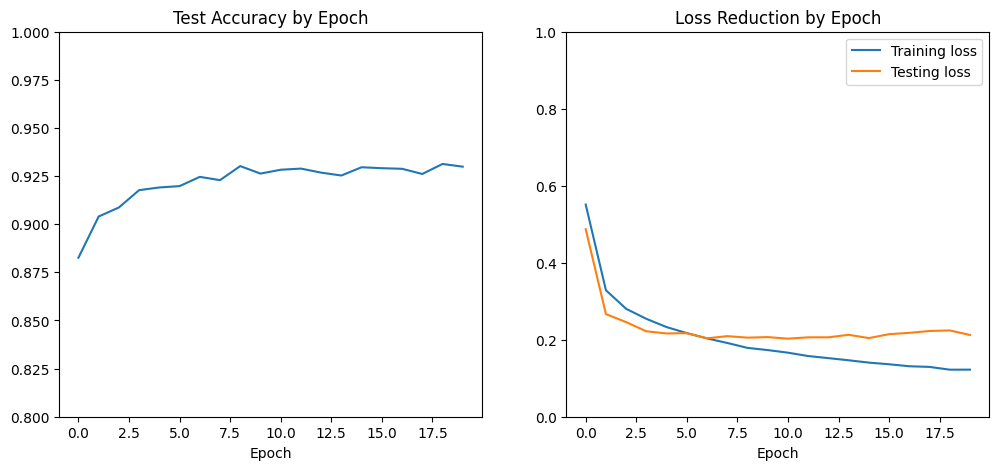

In [39]:
accuracy_and_loss_plots(history)